<a href="https://colab.research.google.com/github/dfu2020/ATMS-597-SP-2020-Project-3-Group-H/blob/master/Project_3_Group_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task: Create code using python xarray to organize and reduce climate data. The goal of this analysis will be to detect global atmospheric circulation patterns (or teleconnections) associated with extreme daily precipitation in a certain part of the globe. You will

(1) Aggregate daily rainfall data from the Global Precipitaiton Climatology Project 1 degree daily precipitation data over the period 1996 - 2019 into a single file from daily files, available here: [https://www.ncei.noaa.gov/data/global-precipitation-climatology-project-gpcp-daily/access/].

(2) Determine the 95% values of daily precipitation during a selected particular 3-month period (given in the table below by group) over the grid box closest to the city you are examining. Plot a cumulative distribution function of all values daily precipitation values and illustrate the 95% value of daily precipitation in millimeters.

(3) Using output from the NCEP Reanalysis [https://journals.ametsoc.org/doi/pdf/10.1175/1520-0477(1996)077%3C0437%3ATNYRP%3E2.0.CO%3B2](Kalnay et al. 1996), compute the global mean fields and seasonal anomaly fields for days meeting and exceeding the threshold of precipitation calculated in the previous step (using the 1981-2010 as a base period for anomalies) of

250 hPa wind vectors and wind speed,
500 hPa winds and geopotential height,
850 hPa temperature, specific humidity, and winds,
skin temperature, and surface winds, and
total atmospheric column water vapor.

(4) Create maps showing the mean fields for the extreme precipitation day composites, long term mean composites for the selected months, and the anomaly fields for each variable. Use contours and vectors when appropriate.

(5) Make Presentation before Friday (Feb. 28th)

In [1]:
%pylab inline
import xarray as xr

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/My Drive/Project_3/

/content/drive/My Drive/Project_3


In [4]:
!pip install netcdf4
!pip install pydap
!pip install wget

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
import netCDF4

In [0]:
#!wget -i urls.txt -e robots=off --cut-dirs=3 --user-agent=Mozilla/5.0 --reject="index.html*" --no-parent --recursive --relative --level=3 --no-directories 

In [0]:
!wget -i -e robots=off --cut-dirs=3 --user-agent=Mozilla/5.0 --reject="index.html*" --no-parent --recursive --relative --level=3 --no-directories 'https://www.ncei.noaa.gov/data/global-precipitation-climatology-project-gpcp-daily/access/'

In [0]:
#urls=''
#f=open('urls.txt','w')
#for x in range(1996, 2020):
#    urls = 'https://www.ncei.noaa.gov/data/global-precipitation-climatology-project-gpcp-daily/access/%d/\n' % (x)
#    f.write(urls)
#f.close


In [0]:
#mdata=xr.open_mfdataset('combined_*.nc', concat_dim="time", data_vars='minimal', coords='minimal', compat='override')
mdata=xr.open_mfdataset('gpcp_v01r03_daily_d*.nc', concat_dim="time", data_vars='minimal', coords='minimal', compat='override')

In [0]:
mdata_new=mdata.sel(time=~mdata.indexes['time'].duplicated())

In [0]:
!rm -r gpcp_v01r03_daily_d*.nc

In [0]:
#rm -r gpcp_v01r03_daily_d2014*.nc

In [0]:
mdata_new.to_netcdf('combined_1996_2019_new.nc',encoding={'precip': {'_FillValue': -9999.0}})

In [15]:
mdata_season=mdata_new.sel(time=(mdata_new['time.season'] == 'DJF'))
mdata_season

<xarray.Dataset>
Dimensions:      (latitude: 180, longitude: 360, nv: 2, time: 2075)
Coordinates:
  * longitude    (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude     (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0
  * time         (time) datetime64[ns] 1996-12-01 1996-12-02 ... 2019-02-28
Dimensions without coordinates: nv
Data variables:
    lon_bounds   (longitude, nv) float32 dask.array<chunksize=(360, 2), meta=np.ndarray>
    lat_bounds   (latitude, nv) float32 dask.array<chunksize=(180, 2), meta=np.ndarray>
    time_bounds  (time, nv) object dask.array<chunksize=(31, 2), meta=np.ndarray>
    precip       (time, latitude, longitude) float32 dask.array<chunksize=(31, 180, 360), meta=np.ndarray>
Attributes:
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G...
    source:                     /data1/GPCP_CDR/GPCP_Output/1DD//bin/199610/s...
    references:                 Huffman et al. 1997, http://dx.doi.org/10.117...
    history:                    1) 2017-05-30T16:52:42Z, Dr. Jian-Jian Wang, ...
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    standard_name_vocabulary:   CF Standard Name Table (v41, 22 February 2017)
    id:                         199610/gpcp_v01r03_daily_d19961001_c20170530.nc
    naming_authority:           gov.noaa.ncdc
    date_created:               2017-05-30T16:52:42Z
    license:                    No constraints on data access or use.
    summary:                    Global Precipitation Climatology Project (GPC...
    keywords:                   EARTH SCIENCE > ATMOSPHERE > PRECIPITATION > ...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Ea...
    cdm_data_type:              Grid
    project:                    GPCP > Global Precipitation Climatology Project
    processing_level:           NASA Level 3
    creator_name:               Dr. Jian-Jian Wang
    creator_email:              jjwang@umd.edu
    institution:                ACADEMIC > UMD/ESSIC > Earth System Science I...
    publisher_name:             NOAA National Centers for Environmental Infor...
    publisher_email:            jjwang@umd.edu
    publisher_url:              https://www.ncei.noaa.gov
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  1 degree
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  1 degree
    time_coverage_start:        1996-10-01T00:00:00Z
    time_coverage_end:          1996-10-01T23:59:59Z
    time_coverage_duration:     P1D
    contributor_name:           Robert Adler, Jian-Jian Wang
    contributor_role:           principalInvestigator, processor and custodian
    acknowledgment:             This project was supported in part by a grant...
    cdr_program:                NOAA Climate Data Record Program for satellit...
    cdr_variable:               precipitation
    metadata_link:              gov.noaa.ncdc:XXXXX
    product_version:            v01r03
    platform:                   GOES (Geostationary Operational Environmental...
    sensor:                     Imager, TOVS > TIROS Operational Vertical Sou...
    spatial_resolution:         1 degree
    comment:                    Processing computer: eagle2.umd.edu

In [0]:
melbourne_precip=mdata_season['precip'].sel(longitude=145.,latitude=-38.+90., method='nearest')

In [34]:
melbourne_precip

<xarray.DataArray 'precip' (time: 2075)>
dask.array<getitem, shape=(2075,), dtype=float32, chunksize=(91,), chunktype=numpy.ndarray>
Coordinates:
    longitude  float32 145.0
    latitude   float32 52.0
  * time       (time) datetime64[ns] 1996-12-01 1996-12-02 ... 2019-02-28
Attributes:
    long_name:      NOAA Climate Data Record (CDR) of Daily GPCP Satellite-Ga...
    standard_name:  lwe_precipitation_rate
    units:          mm/day
    valid_range:    [  0. 100.]
    cell_methods:   area: mean time: mean

In [0]:
p=melbourne_precip.where(melbourne_precip > -999.0, drop=True).values


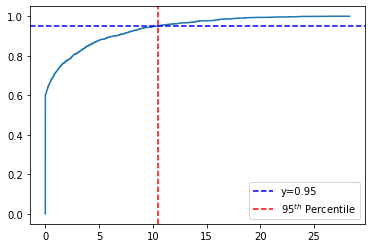

In [54]:
n = np.arange(1,len(p)+1) / np.float(len(p))
Xs = np.sort(p)
fig, ax = plt.subplots()
ax.step(Xs,n) 
plt.axhline(0.95,c='b',ls='--',label='y=0.95')
plt.axvline(np.quantile(p,0.95),c='r',ls='--',label='$95^{th}$ Percentile')
plt.legend()
plt.show()

In [0]:
exceed_precip=melbourne_precip.where(melbourne_precip > np.quantile(p,0.95), drop=True)

In [56]:
exceed_precip.to_netcdf('melbourne_precip_95.nc')

<xarray.DataArray 'precip' (time: 104)>
dask.array<where, shape=(104,), dtype=float32, chunksize=(10,), chunktype=numpy.ndarray>
Coordinates:
    longitude  float32 145.0
    latitude   float32 52.0
  * time       (time) datetime64[ns] 1996-12-06 1996-12-07 ... 2018-12-08
Attributes:
    long_name:      NOAA Climate Data Record (CDR) of Daily GPCP Satellite-Ga...
    standard_name:  lwe_precipitation_rate
    units:          mm/day
    valid_range:    [  0. 100.]
    cell_methods:   area: mean time: mean